In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [6]:
dataset = pd.read_csv("Wholesale customers data.csv")
dataset.shape
dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
dataset['Channel']=dataset['Channel'].astype('category')
dataset['Region'] = dat aset['Region'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Channel           440 non-null    category
 1   Region            440 non-null    category
 2   Fresh             440 non-null    int64   
 3   Milk              440 non-null    int64   
 4   Grocery           440 non-null    int64   
 5   Frozen            440 non-null    int64   
 6   Detergents_Paper  440 non-null    int64   
 7   Delicassen        440 non-null    int64   
dtypes: category(2), int64(6)
memory usage: 21.9 KB


In [9]:
X = dataset
num_cols = ["Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]

cat_cols = ["Channel","Region"]
dummies = pd.get_dummies(X[cat_cols])
X1 = X[num_cols]
X2 = pd.concat([dummies, X1],axis = 1)
X= X2
y = dataset["Frozen"]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
X_train.head(5)

X_test0 = X_test
y_test0 = y_test

In [11]:
i = 2
from sklearn.decomposition import PCA
pca = PCA(n_components = i)
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("variation explained by each principal components")
list(explained_variance)


variation explained by each principal components


[0.46595784879068086, 0.40473044136593767]

C:\Users\vdivy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


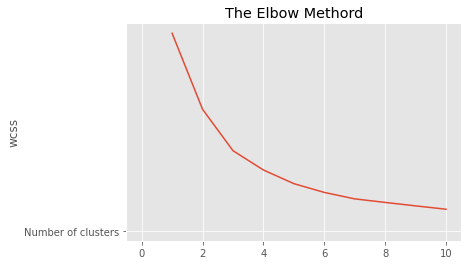

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=0)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Methord')
plt.plot('Number of clusters')
plt.ylabel('wcss')
plt.show()